In [1]:
%%capture
#!pip install transformers

In [2]:
!python -m pip install -U "mxnet_cu101<2.0.0"
!python -m pip install --pre autogluon

     |████████████████████████████████| 356.7 MB 34 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 246 kB 5.3 MB/s 
     |████████████████████████████████| 407 kB 40.1 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 59 kB 6.9 MB/s 
     |████████████████████████████████| 802 kB 34.1 MB/s 
     |████████████████████████████████| 27.4 MB 52.5 MB/s 
     |████████████████████████████████| 206 kB 43.7 MB/s 
     |████████████████████████████████| 1.0 MB 36.2 MB/s 
     |████████████████████████████████| 4.2 MB 35.9 MB/s 
     |████████████████████████████████| 131 kB 48.0 MB/s 
     |████████████████████████████████| 119 kB 44.2 MB/s 
     |████████████████████████████████| 1.3 MB 32.8 MB/s 
     |████████████████████████████████| 3.0 MB 37.5 MB/s 
     |███████████████████████

In [3]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html



Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 15 kB/s 
     |████████████████████████████████| 12.8 MB 33.7 MB/s 
     |████████████████████████████████| 7.6 MB 4.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.10.0+cu111
    Uninstalling torchaudio-0.10.0+cu111:
      Successfully uninstalled torchaudio-0.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch

In [4]:
!pip install autogluon

In [5]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [6]:
# Should give the output as 1
import torch
import mxnet as mx
mx.context.num_gpus()

1

In [7]:
!pip install tokenizers==0.10.1

     |████████████████████████████████| 3.2 MB 5.2 MB/s 
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.9.4
    Uninstalling tokenizers-0.9.4:
      Successfully uninstalled tokenizers-0.9.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-contrib-nlp 0.0.1b20210201 requires tokenizers==0.9.4, but you have tokenizers 0.10.1 which is incompatible.


In [22]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 44.2 MB/s 
     |████████████████████████████████| 61 kB 478 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-contrib-nlp 0.0.1b20210201 requires tokenizers==0.9.4, but you have tokenizers 0.10.1 which is incompatible.


In [23]:
import numpy as np
import pandas as pd
import math
import torch
import transformers as ppb
import warnings
import re
warnings.filterwarnings('ignore')

In [9]:
from autogluon.core.utils import get_gpu_count, get_gpu_count_mxnet, get_gpu_count_torch, get_gpu_count_all
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import pprint
import random
from autogluon.tabular import TabularPredictor
import mxnet as mx

np.random.seed(123)
random.seed(123)
mx.random.seed(123)

In [10]:
# DON'T Proceed if the result is not [1, 1, 1, 1]
print(get_gpu_count())
print(get_gpu_count_mxnet())
print(get_gpu_count_torch())
print(get_gpu_count_all())

1
1
1
1


In [11]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/CS544 Project/notebooks

Mounted at /content/drive
/content/drive/Shareddrives/CS544 Project/notebooks


In [12]:
dfs = pd.read_excel("nlp_path_data.xlsx")
#dfs = dfs.rename(columns={'10000194': 'numbers', 'S19-09556': 'code', "Invasive carcinoma of no special type (invasive ductal carcinoma, not otherwise ...": "descriptions"})

In [13]:
dfs.head()

,Dx,Code
0,Adenocarcinoma,8140
1,Adenocarcinoma,8140
2,Adenocarcinoma,8140
3,Adenocarcinoma,8140
4,Adenocarcinoma,8140


In [14]:
np.unique(dfs["Code"])
print(len(np.unique(dfs["Code"])))

117


In [15]:
dfs["Code"].value_counts()

8500    1563
8140     827
8550     796
8070     325
8120     294
        ... 
9043       1
9231       1
8046       1
9680       1
8806       1
Name: Code, Length: 117, dtype: int64

In [16]:
# Codes we actually want to use:
df_grouped = dfs.groupby(["Code"]).count().reset_index()
codes = df_grouped[df_grouped["Dx"] > 10]["Code"].values
codes

array([8000, 8010, 8020, 8050, 8070, 8071, 8072, 8085, 8120, 8130, 8140,
       8144, 8150, 8170, 8230, 8240, 8250, 8252, 8260, 8310, 8312, 8317,
       8335, 8340, 8380, 8441, 8442, 8461, 8480, 8500, 8510, 8520, 8522,
       8550, 8575, 8720, 8721, 8742, 8743, 8744, 8745, 8802, 8850, 8858,
       8890, 8936, 9061, 9070, 9071])

In [17]:
dfs = dfs[dfs["Code"].isin(codes)]
dfs

,Dx,Code
0,Adenocarcinoma,8140
1,Adenocarcinoma,8140
2,Adenocarcinoma,8140
3,Adenocarcinoma,8140
4,Adenocarcinoma,8140
...,...,...
6792,Squamous Cell Carcinoma and Variants,8070
6793,"Squamous cell carcinoma, conventional",8070
6794,Ductal carcinoma in situ,8500
6795,Serous carcinoma,8441


In [18]:
dfs["Code"].value_counts()

8500    1563
8140     827
8550     796
8070     325
8120     294
8312     237
8050     213
8743     204
8441     184
8380     181
8520     174
8000     173
8480     118
8130     115
8720      96
8010      85
8522      71
8936      70
8260      66
8150      58
8721      47
8240      47
8071      46
8744      44
8340      38
8850      34
8742      31
8170      27
8745      26
8072      25
8317      24
8461      20
8230      19
9061      19
8802      18
8575      17
8858      16
8250      15
8020      15
8252      15
8890      14
8442      14
9070      13
8085      13
8335      13
8310      13
8510      12
9071      12
8144      11
Name: Code, dtype: int64

# Preprocessing:

In [19]:
#remove non-alphabetical characters, lower case, puctuation, extra spaces. 
dfs["Dx"] = dfs["Dx"].str.lower()
dfs["Dx"] = dfs["Dx"].replace(r'[^a-z|\s]', '', regex=True)
dfs["Dx"] = dfs["Dx"].replace(r'\s\s+', ' ', regex=True)


# BERT Embedding

In [24]:
#Load the pretrained bert model
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [25]:
dfs

,Dx,Code
0,adenocarcinoma,8140
1,adenocarcinoma,8140
2,adenocarcinoma,8140
3,adenocarcinoma,8140
4,adenocarcinoma,8140
...,...,...
6792,squamous cell carcinoma and variants,8070
6793,squamous cell carcinoma conventional,8070
6794,ductal carcinoma in situ,8500
6795,serous carcinoma,8441


In [26]:

#icd_codes = dfs["preprocessed_ICD_codes"]
icd_codes_d = {}
for i, code in sorted(enumerate(set(dfs["Code"]))):
  icd_codes_d[code] = i
icd_codes_d

{8000: 25,
 8010: 29,
 8020: 33,
 8050: 42,
 8070: 0,
 8071: 1,
 8072: 2,
 8085: 9,
 8120: 19,
 8130: 26,
 8140: 31,
 8144: 32,
 8150: 34,
 8170: 39,
 8230: 16,
 8240: 17,
 8250: 21,
 8252: 23,
 8260: 27,
 8310: 43,
 8312: 44,
 8317: 47,
 8335: 4,
 8340: 8,
 8380: 22,
 8441: 45,
 8442: 46,
 8461: 3,
 8480: 11,
 8500: 18,
 8510: 24,
 8520: 28,
 8522: 30,
 8550: 37,
 8575: 48,
 8720: 5,
 8721: 6,
 8742: 12,
 8743: 13,
 8744: 14,
 8745: 15,
 8802: 35,
 8850: 7,
 8858: 10,
 8890: 20,
 8936: 38,
 9061: 36,
 9070: 40,
 9071: 41}

In [27]:
dfs['Code_n'] = dfs['Code'].apply(lambda x: icd_codes_d[x])
dfs['Code_n']

0       31
1       31
2       31
3       31
4       31
        ..
6792     0
6793     0
6794    18
6795    45
6796    37
Name: Code_n, Length: 6508, dtype: int64

In [28]:
dfs

,Dx,Code,Code_n
0,adenocarcinoma,8140,31
1,adenocarcinoma,8140,31
2,adenocarcinoma,8140,31
3,adenocarcinoma,8140,31
4,adenocarcinoma,8140,31
...,...,...,...
6792,squamous cell carcinoma and variants,8070,0
6793,squamous cell carcinoma conventional,8070,0
6794,ductal carcinoma in situ,8500,18
6795,serous carcinoma,8441,45


In [29]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dfs, test_size=0.2)

In [30]:
train = train.reset_index(drop = True)
train

,Dx,Code,Code_n
0,acinar adenocarcinoma,8550,37
1,papillary urothelial carcinoma noninvasive,8130,26
2,papillary carcinoma other variant specify,8260,27
3,papillary urothelial carcinoma invasive,8130,26
4,invasive lobular carcinoma,8520,28
...,...,...,...
5201,endometrioid carcinoma nos,8380,22
5202,serous carcinoma,8441,45
5203,invasive lobular carcinoma,8520,28
5204,diffuse type includes signetring carcinoma cla...,8010,29


In [31]:
test = test.reset_index(drop = True)
test

,Dx,Code,Code_n
0,acinar adenocarcinoma,8550,37
1,acinar adenocarcinoma,8550,37
2,acinar adenocarcinoma,8550,37
3,invasive carcinoma of no special type ductal n...,8500,18
4,invasive carcinoma of no special type invasive...,8500,18
...,...,...,...
1297,invasive carcinoma of no special type ductal n...,8500,18
1298,adenocarcinoma,8140,31
1299,papillary carcinoma follicular variant encapsu...,8340,8
1300,invasive mucinous adenocarcinoma,8252,23


In [105]:
#pad everything to the same size! Set to the length of the largest input
tokenized = test["Dx"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
print(tokenized[0])
# Set manually 
max_len = 34

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
#implement the attention mask
attention_mask = np.where(padded != 0, 1, 0)
print(attention_mask[0])
test_attention_mask = attention_mask
input_ids = torch.tensor(padded)
index = 1
print(input_ids[index])
print(test["Dx"][index])

[101, 9353, 3981, 2099, 16298, 24755, 11890, 5740, 2863, 102]
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
tensor([  101,  9353,  3981,  2099, 16298, 24755, 11890,  5740,  2863,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])
acinar adenocarcinoma


In [106]:
test_df = pd.DataFrame(columns = ['Dx', 'Code_n'])
test_df['Dx'] = test['Dx'].values.tolist()
test_df['Code_n'] = test['Code_n'].values.tolist()
test_df

,Dx,Code_n
0,acinar adenocarcinoma,37
1,acinar adenocarcinoma,37
2,acinar adenocarcinoma,37
3,invasive carcinoma of no special type ductal n...,18
4,invasive carcinoma of no special type invasive...,18
...,...,...
1297,invasive carcinoma of no special type ductal n...,18
1298,adenocarcinoma,31
1299,papillary carcinoma follicular variant encapsu...,8
1300,invasive mucinous adenocarcinoma,23


In [108]:
test_df_cp = test_df.copy()
test_inputs = torch.tensor(input_ids)

In [109]:
test_df.shape

(1302, 2)

In [35]:
x_test = input_ids
attention_mask_test = attention_mask
y_test = test['Code_n'].values
x_test.shape, y_test.shape

(torch.Size([1302, 34]), (1302,))

In [36]:
test_data = []
for i in range(len(x_test)):
    test_data.append([attention_mask_test[i], x_test[i], y_test[i]])

In [37]:
dfs = train

## Upsampling

In [38]:
dfs['Code'].value_counts()

8500    1268
8140     669
8550     636
8070     264
8120     235
8312     189
8050     176
8743     153
8441     153
8380     146
8520     137
8000     132
8480     100
8130      90
8720      76
8010      62
8936      61
8522      51
8260      48
8150      44
8240      41
8721      39
8071      34
8744      32
8850      31
8340      29
8742      27
8170      24
8745      22
8317      22
8230      16
8461      16
8072      16
8575      15
9061      14
8802      12
8252      12
8858      12
8890      11
8085      11
8250      10
8310      10
8335       9
8510       9
8020       9
8144       9
9070       8
9071       8
8442       8
Name: Code, dtype: int64

In [39]:
### Upsample for Class balance:
from sklearn.utils import resample

df_majority = dfs[dfs.loc[:,"Code"]==8500]
max_len = len(df_majority)
for code in codes:
  if code != 8500:
    df_minority = dfs[dfs.loc[:,"Code"]==code]
    upsampled_minority = resample(df_minority, replace=True, n_samples=max_len)
    df_majority = pd.concat([df_majority, upsampled_minority])

df_majority

,Dx,Code,Code_n
5,invasive carcinoma of no special type ductal,8500,18
7,invasive carcinoma of no special type ductal n...,8500,18
8,invasive carcinoma of no special type ductal n...,8500,18
11,ductal carcinoma in situ,8500,18
13,invasive carcinoma of no special type ductal n...,8500,18
...,...,...,...
1024,yolk sac tumor postpubertal type specify perce...,9071,41
4864,yolk sac tumor endodermal sinus tumor,9071,41
2645,yolk sac tumor postpubertal type specify perce...,9071,41
672,yolk sac tumor postpubertal type specify perce...,9071,41


In [40]:
#Proof of upsample working:
df_majority["Code"].value_counts()[1:10]

8522    1268
8936    1268
8744    1268
8520    1268
8072    1268
9071    1268
8335    1268
9070    1268
8170    1268
Name: Code, dtype: int64

In [41]:
### How many Codes do we want??? 1) 117 2) grouped version

In [42]:
df_upsampled = df_majority.copy()

In [43]:
'''
#remove non-alphabetical characters, lower case, puctuation, extra spaces. 
df_upsampled["Dx"] = df_upsampled["Dx"].str.lower()
df_upsampled["Dx"] = df_upsampled["Dx"].replace(r'[^a-z|\s]', '', regex=True)
df_upsampled["Dx"] = df_upsampled["Dx"].replace(r'\s\s+', ' ', regex=True)
'''

'\n#remove non-alphabetical characters, lower case, puctuation, extra spaces. \ndf_upsampled["Dx"] = df_upsampled["Dx"].str.lower()\ndf_upsampled["Dx"] = df_upsampled["Dx"].replace(r\'[^a-z|\\s]\', \'\', regex=True)\ndf_upsampled["Dx"] = df_upsampled["Dx"].replace(r\'\\s\\s+\', \' \', regex=True)\n'

In [44]:
df_upsampled["Dx"]

5            invasive carcinoma of no special type ductal
7       invasive carcinoma of no special type ductal n...
8       invasive carcinoma of no special type ductal n...
11                               ductal carcinoma in situ
13      invasive carcinoma of no special type ductal n...
                              ...                        
1024    yolk sac tumor postpubertal type specify perce...
4864                yolk sac tumor endodermal sinus tumor
2645    yolk sac tumor postpubertal type specify perce...
672     yolk sac tumor postpubertal type specify perce...
4864                yolk sac tumor endodermal sinus tumor
Name: Dx, Length: 62132, dtype: object

In [45]:
df_upsampled.head()

,Dx,Code,Code_n
5,invasive carcinoma of no special type ductal,8500,18
7,invasive carcinoma of no special type ductal n...,8500,18
8,invasive carcinoma of no special type ductal n...,8500,18
11,ductal carcinoma in situ,8500,18
13,invasive carcinoma of no special type ductal n...,8500,18


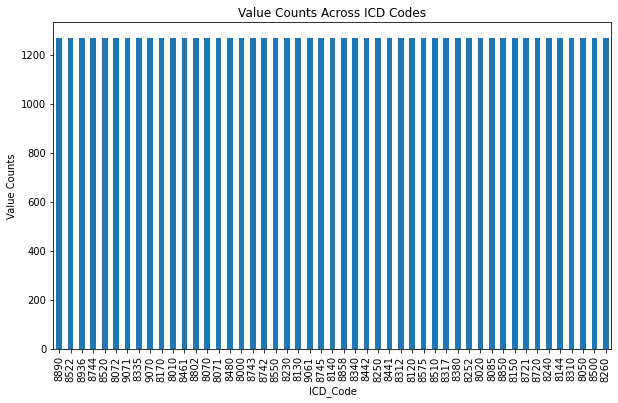

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
df_upsampled['Code'].value_counts().plot(ax=ax, kind='bar')
ax.set_xlabel("ICD_Code")
ax.set_ylabel("Value Counts")
ax.set_title("Value Counts Across ICD Codes");

In [47]:
'''
#Load the pretrained bert model
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)
'''

"\n#Load the pretrained bert model\nmodel_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')\n\n# Load pretrained model/tokenizer\ntokenizer = tokenizer_class.from_pretrained(pretrained_weights)\nmodel = model_class.from_pretrained(pretrained_weights)\n"

In [48]:
from transformers import AutoModel
bert = AutoModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [49]:
#df_upsampled.iloc[1392]

In [50]:
tokenized = df_upsampled["Dx"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [51]:
tokenized.iloc[1392]

[101,
 13866,
 13656,
 2062,
 2084,
 4642,
 1998,
 2625,
 2084,
 2030,
 5020,
 2000,
 4642,
 1999,
 4602,
 9812,
 102]

In [52]:
#pad everything to the same size! Set to the length of the largest input
max_len = 34
'''
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)
'''
padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [53]:
#implement the attention mask
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(62132, 34)

In [54]:
input_ids = torch.tensor(padded)

In [55]:
#input_ids is the embedding of the sentence
print(len(input_ids))
print(len(df_upsampled))

62132
62132


In [56]:
index = 1
print(input_ids[index])
print(df_upsampled["Dx"][index])

tensor([  101, 17503,  2482, 21081,  2863,  1997,  2053,  2569,  2828, 23245,
         2389,  2025,  4728,  9675,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])
1    papillary urothelial carcinoma noninvasive
1    papillary urothelial carcinoma noninvasive
1    papillary urothelial carcinoma noninvasive
1    papillary urothelial carcinoma noninvasive
1    papillary urothelial carcinoma noninvasive
1    papillary urothelial carcinoma noninvasive
1    papillary urothelial carcinoma noninvasive
1    papillary urothelial carcinoma noninvasive
1    papillary urothelial carcinoma noninvasive
1    papillary urothelial carcinoma noninvasive
1    papillary urothelial carcinoma noninvasive
1    papillary urothelial carcinoma noninvasive
1    papillary urothelial carcinoma noninvasive
1    papillary urothelial carcinoma noninvasive
1    papillary urothelial carcinoma noninvasive
1    papi

In [57]:
### Have to encode 0-9 each of the ICD Codes: 

In [90]:
#vectorize the Y keys to corresponding values:
y_train = df_upsampled["Code"].values
y_train = np.vectorize(icd_codes_d.get)(y_train)
y_train

array([18, 18, 18, ..., 41, 41, 41])

In [91]:
# train, dev, test: 

In [92]:
total_vals = df_upsampled['Dx'].values

In [93]:
input_ids.shape, total_vals.shape

(torch.Size([62132, 34]), (62132,))

In [94]:
# train-test split:
test_size = int(np.floor(len(y_train)*.25))
rand_test_ints = np.random.randint(low=0, high=len(y_train), size=test_size)
print(y_train.shape)
y_dev = y_train[rand_test_ints]
y_train = np.delete(y_train, rand_test_ints, axis=0)

x_dev = total_vals[rand_test_ints]
print(x_dev.shape, total_vals.shape)
x_train = np.delete(total_vals, rand_test_ints, axis=0)
print(x_train.shape)
x_train_k = np.delete(input_ids, rand_test_ints, axis=0) 
print(x_train_k.shape)
attention_mask_dev = attention_mask[rand_test_ints]
attention_mask_train = np.delete(attention_mask, rand_test_ints, axis = 0)

(62132,)
(15533,) (62132,)
(48408,)
torch.Size([48408, 34])


In [95]:
y_train.shape, x_train.shape

((48408,), (48408,))

In [96]:
subsample_size = 2000  # for quick demo, try setting to larger values
feature_columns = ['Dx']
label = 'Code_n'

train_df = pd.DataFrame(x_train, columns = ['Dx'])
train_df['Code_n'] = y_train
dev_df = pd.DataFrame(x_dev, columns = ['Dx'])
dev_df['Code_n'] = y_dev

train_df = train_df[feature_columns + [label]]
dev_df = dev_df[feature_columns + [label]]
test_df = test_df[feature_columns]
print('Number of training samples:', len(train_df))
print('Number of dev samples:', len(dev_df))
print('Number of test samples:', len(test_df))

Number of training samples: 48408
Number of dev samples: 15533
Number of test samples: 1302


In [65]:
dev_df.head()

,Dx,Code_n
0,invasive adenocarcinoma solid predominant,16
1,acinar adenocarcinoma,37
2,acrallentiginous melanoma,14
3,mucinous carcinoma,11
4,undifferentiated pleomorphic sarcoma,35


In [103]:
from lightgbm import LGBMClassifier
model_1 = LGBMClassifier(boosting_type='gbdt', learning_rate= 0.05, num_boost_round=7,num_threads= -1, objective='multiclass',
 two_round= True, verbose= -1)
model_1.fit(x_train_k, train_df['Code_n'])

LGBMClassifier(learning_rate=0.05, num_boost_round=7, num_threads=-1,
               objective='multiclass', two_round=True, verbose=-1)

In [111]:
predicted_vals = model_1.predict(test_inputs)

In [112]:
from sklearn.metrics import classification_report, average_precision_score
print(classification_report(test_df['Code_n'], predicted_vals))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       0.92      1.00      0.96        12
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       0.95      0.95      0.95        20
           6       1.00      0.88      0.93         8
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         4
          11       0.95      1.00      0.97        18
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00        51
          14       1.00      1.00      1.00        12
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
          17       0.80    

In [116]:
!pip install catboost

In [119]:
from catboost import CatBoostClassifier

model_2 = CatBoostClassifier(
allow_writing_files =  False,
 eval_metric =  'Accuracy',
 iterations =  154,
 learning_rate = 0.05,
 random_seed = 0
)


model_2.fit(np.array(x_train_k), train_df['Code_n'],  verbose=True
)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.5045654	total: 1.13s	remaining: 2m 53s
1:	learn: 0.5894893	total: 2.3s	remaining: 2m 54s
2:	learn: 0.6749504	total: 3.44s	remaining: 2m 53s
3:	learn: 0.8590729	total: 4.57s	remaining: 2m 51s
4:	learn: 0.8853289	total: 5.7s	remaining: 2m 49s
5:	learn: 0.9070402	total: 6.84s	remaining: 2m 48s
6:	learn: 0.9070402	total: 7.98s	remaining: 2m 47s
7:	learn: 0.9138572	total: 9.12s	remaining: 2m 46s
8:	learn: 0.9453603	total: 10.2s	remaining: 2m 45s
9:	learn: 0.9560197	total: 11.4s	remaining: 2m 43s
10:	learn: 0.9568253	total: 12.5s	remaining: 2m 42s
11:	learn: 0.9627128	total: 13.7s	remaining: 2m 41s
12:	learn: 0.9635804	total: 14.8s	remaining: 2m 40s
13:	learn: 0.9635804	total: 15.9s	remaining: 2m 39s
14:	learn: 0.9672781	total: 17.1s	remaining: 2m 38s
15:	learn: 0.9672781	total: 18.2s	remaining: 2m 37s
16:	learn: 0.9737027	total: 19.4s	remaining: 2m 35s
17:	learn: 0.9710585	total: 20.5s	remaining: 2m 34s
18:	learn: 0.9801892	total: 21.6s	remaining: 2m 33s
19:	learn: 0.9801892	tot

In [122]:
predicted_vals = model_2.predict(np.array(test_inputs))


In [123]:
from sklearn.metrics import classification_report, average_precision_score
print(classification_report(test_df['Code_n'], predicted_vals))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      0.95      0.97        20
           6       1.00      0.88      0.93         8
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         4
          11       0.90      1.00      0.95        18
          12       0.80      1.00      0.89         4
          13       1.00      1.00      1.00        51
          14       1.00      1.00      1.00        12
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
          17       0.83    

Problem Type="multiclass"
Column Types:
   - "Dx": text
   - "Code_n": categorical

The GluonNLP V0 backend is used. We will use 2 cpus and 1 gpus to train each trial.


All Logs will be saved to /content/drive/Shareddrives/CS544 Project/notebooks/ag_tabular_product_sentiment_text_predictor_20_epochs/task0/training.log


Fitting and transforming the train data...
Done! Preprocessor saved to /content/drive/Shareddrives/CS544 Project/notebooks/ag_tabular_product_sentiment_text_predictor_20_epochs/task0/preprocessor.pkl
Process dev set...
Done!
Max length for chunking text: 64, Stochastic chunk: Train-False/Test-False, Test #repeat: 1.
#Total Params/Fixed Params=108996529/0
Using gradient accumulation. Global batch size = 128
Local training results will be saved to /content/drive/Shareddrives/CS544 Project/notebooks/ag_tabular_product_sentiment_text_predictor_20_epochs/task0/results_local.jsonl.
[Iter 19/3790, Epoch 0] train loss=4.16e+00, gnorm=6.36e+00, lr=5.01e-06, #samples processed=2432, #sample per second=62.33. ETA=129.06min
[Iter 38/3790, Epoch 0] train loss=3.64e+00, gnorm=7.04e+00, lr=1.00e-05, #samples processed=2432, #sample per second=62.79. ETA=127.95min
[Iter 57/3790, Epoch 0] train loss=2.83e+00, gnorm=7.89e+00, lr=1.50e-05, #samples processed=2432, #sample per second=62.45. ETA=127.38min


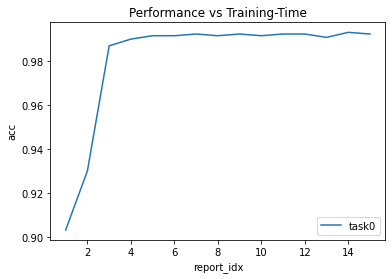

Training completed. Auto-saving to "ag_tabular_product_sentiment_text_predictor_20_epochs/". For loading the model, you can use `predictor = TextPredictor.load("ag_tabular_product_sentiment_text_predictor_20_epochs/")`


In [ ]:
# Stacking up
from autogluon.text import TextPredictor
predictor = TextPredictor(label='Code_n', path='ag_tabular_product_sentiment_text_predictor_20_epochs')
predictor.fit(train_df, tuning_data=dev_df, hyperparameters={'epochs':20}, time_limit=2400)

In [ ]:
c

NameError: ignored

In [ ]:
!pip install torch==1.8.0

     |████████████████████████████████| 735.5 MB 14 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires torch==1.10.0, but you have torch 1.8.0 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.8.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.8.0 which is incompatible.


In [ ]:
!pip install torchvision==0.9.0

     |████████████████████████████████| 17.3 MB 116 kB/s 
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111


In [ ]:
!pip install autogluon

  Using cached tokenizers-0.9.4-cp37-cp37m-manylinux2010_x86_64.whl (2.9 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.10.3
    Uninstalling tokenizers-0.10.3:
      Successfully uninstalled tokenizers-0.10.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.12.5 requires tokenizers<0.11,>=0.10.1, but you have tokenizers 0.9.4 which is incompatible.


In [ ]:
import torch

In [ ]:
import torch 
print(torch.__version__)


1.8.0


In [ ]:
x_train

tensor([[  101, 23245,  2389,  ...,     0,     0,     0],
        [  101, 17503,  2482,  ...,     0,     0,     0],
        [  101, 23245,  2389,  ...,     0,     0,     0],
        ...,
        [  101, 10930, 13687,  ...,     0,     0,     0],
        [  101, 10930, 13687,  ...,     0,     0,     0],
        [  101, 10930, 13687,  ...,     0,     0,     0]])

In [ ]:
y_train.shape, y_dev.shape, attention_mask_dev.shape, attention_mask_test.shape, attention_mask_train.shape

((47963,), (15386,), (15386, 34), (1302, 34), (47963, 34))

In [ ]:
#Format X, Y for input into NN: (For Dataloader)
train_data = []
for i in range(len(x_train)):
    train_data.append([attention_mask_train[i],x_train[i], y_train[i]])
    
dev_data = []
for i in range(len(x_dev)):
    dev_data.append([attention_mask_dev[i],x_dev[i], y_dev[i]])

In [ ]:
y_train = torch.tensor(y_train)
y_dev = torch.tensor(y_dev)

In [ ]:
x_dev.shape

torch.Size([15386, 34])

# Classifying

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torch import nn

In [ ]:
attention_mask_train = torch.tensor(attention_mask_train)
attention_mask_dev = torch.tensor(attention_mask_dev)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(x_train, attention_mask_train, y_train)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(x_dev, attention_mask_dev, y_dev)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
test_data = TensorDataset(x_test, attention_mask_test, y_test)

# sampler for sampling the data during training
test_sampler = SequentialSampler(test_data)

# dataLoader for validation set
test_dataloader = DataLoader(test_data, sampler = test_sampler, batch_size=batch_size)


In [ ]:
y_test = torch.tensor(y_test)
attention_mask_test = torch.tensor(attention_mask_test)
test_data = TensorDataset(x_test, attention_mask_test, y_test)

# sampler for sampling the data during training
test_sampler = SequentialSampler(test_data)

# dataLoader for validation set
test_dataloader = DataLoader(test_data, sampler = test_sampler, batch_size=batch_size)


In [ ]:
# Try once without these:
for param in bert.parameters():
    param.requires_grad = False

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,49)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict = False)
      
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [ ]:
device = torch.device('cuda')
device

device(type='cuda')

In [ ]:
model_t = BERT_Arch(bert)

# push the model to GPU
model = model_t.to(device)

In [ ]:
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)  

In [ ]:
cross_entropy  = nn.NLLLoss() 

# number of training epochs
epochs = 10

In [ ]:
def train():
  
  model_t.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [ ]:
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      # elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [ ]:
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(50):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10
  Batch    50  of  1,499.
  Batch   100  of  1,499.
  Batch   150  of  1,499.
  Batch   200  of  1,499.
  Batch   250  of  1,499.
  Batch   300  of  1,499.
  Batch   350  of  1,499.
  Batch   400  of  1,499.
  Batch   450  of  1,499.
  Batch   500  of  1,499.
  Batch   550  of  1,499.
  Batch   600  of  1,499.
  Batch   650  of  1,499.
  Batch   700  of  1,499.
  Batch   750  of  1,499.
  Batch   800  of  1,499.
  Batch   850  of  1,499.
  Batch   900  of  1,499.
  Batch   950  of  1,499.
  Batch 1,000  of  1,499.
  Batch 1,050  of  1,499.
  Batch 1,100  of  1,499.
  Batch 1,150  of  1,499.
  Batch 1,200  of  1,499.
  Batch 1,250  of  1,499.
  Batch 1,300  of  1,499.
  Batch 1,350  of  1,499.
  Batch 1,400  of  1,499.
  Batch 1,450  of  1,499.

Evaluating...
  Batch    50  of    481.
  Batch   100  of    481.
  Batch   150  of    481.
  Batch   200  of    481.
  Batch   250  of    481.
  Batch   300  of    481.
  Batch   350  of    481.
  Batch   400  of    481.
  Batch 

KeyboardInterrupt: ignored

In [ ]:
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
with torch.no_grad():
  preds = model(x_test.to(device), attention_mask_test.to(device))
  preds = preds.detach().cpu().numpy()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
preds = np.argmax(preds, axis = 1)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69        62
           1       0.67      0.75      0.71         8
           2       0.33      0.60      0.43         5
           3       0.56      1.00      0.71         5
           4       0.00      0.00      0.00         0
           5       0.68      0.87      0.76        15
           6       0.25      0.62      0.36         8
           7       0.80      0.67      0.73         6
           8       0.62      0.89      0.73         9
           9       0.50      1.00      0.67         2
          10       1.00      1.00      1.00         5
          11       0.57      0.35      0.43        23
          12       0.62      0.83      0.71         6
          13       0.87      0.81      0.84        42
          14       0.21      0.75      0.32         8
          15       0.50      1.00      0.67         4
          16       0.27      0.75      0.40         4
          17       0.64    